In [14]:
import numpy as np 
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [15]:
csv_path = "/Users/danishmir/desktop/737-project/Analysis/oneHot_withCATEGORY.csv"

In [16]:
df=pd.read_csv(csv_path)

In [17]:
df.shape

(961946, 14)

In [18]:
df=df.sample(frac=0.01, random_state=1)# creating random sample from df with 10% data entreis, this is to reduce computation as my machine is unable to handle the data

In [19]:
df.shape

(9619, 14)

In [20]:
df.head(5)

,Unnamed: 0,X,DURATION,HOURLY_WAGE,WAGE_RATE_OF_PAY_FROM_HOUR,WILLFUL_VIOLATOR,OCCUPATION,AGENT_PRESENT_0.0,AGENT_PRESENT_1.0,CASE_STATUS_0.0,CASE_STATUS_1.0,WAGE_RATE_OF_PAY_FROM_HOUR_RANGE,DURATION_RANGE,HOURLY_WAGE_RANGE
759346,759347,759346,6,47.4,47.40,4,computer occupations,1,0,0,1,"(40,50]","(0,10]","(40,50]"
356932,356933,356932,6,20.9,20.94,35,Others,1,0,0,1,"(20,30]","(0,10]","(20,30]"
620091,620092,620091,4,35.7,36.60,9,Financial Occupation,0,1,0,1,"(30,40]","(0,10]","(30,40]"
663836,663837,663836,7,30.6,34.10,49,computer occupations,1,0,0,1,"(30,40]","(0,10]","(30,40]"
257533,257534,257533,6,33.9,34.40,35,computer occupations,0,1,0,1,"(30,40]","(0,10]","(30,40]"


In [21]:
df=df.rename(columns={"CASE_STATUS_0.0": "CASE_STATUS", "AGENT_PRESENT_0.0": "AGENT_PRESENT"})

In [22]:
#df['AGENT_PRESENT'].replace(0, "Absent", inplace=True)#un-encode AGENT_PRESENT

In [23]:
#df["AGENT_PRESENT"].replace(1, "Present", inplace=True)#un-encode AGENT_PRESENT

In [24]:
#df.head(5)

In [25]:
#df['WORKSITE_STATE']=df['WORKSITE_STATE'].astype('category')

In [26]:
#df['WILLFUL_VIOLATOR']=df['WILLFUL_VIOLATOR'].astype('category')

In [27]:
#df['EMPLOYER_STATE']=df['EMPLOYER_STATE'].astype('category')

In [28]:
#df['CASE_STATUS']=df['CASE_STATUS'].astype('category')

In [29]:
#df['AGENT_PRESENT']=df['AGENT_PRESENT'].astype('category')

In [30]:
df.dtypes

Unnamed: 0                            int64
X                                     int64
DURATION                              int64
HOURLY_WAGE                         float64
WAGE_RATE_OF_PAY_FROM_HOUR          float64
WILLFUL_VIOLATOR                      int64
OCCUPATION                           object
AGENT_PRESENT                         int64
AGENT_PRESENT_1.0                     int64
CASE_STATUS                           int64
CASE_STATUS_1.0                       int64
WAGE_RATE_OF_PAY_FROM_HOUR_RANGE     object
DURATION_RANGE                       object
HOURLY_WAGE_RANGE                    object
dtype: object

In [31]:
#lets select some features which we want to use for classifier

In [79]:
cdf = df[['DURATION', 'HOURLY_WAGE', 'AGENT_PRESENT', 'CASE_STATUS']]# dropping all categorical values in cdf as k-means is not applicable on categorical variables

In [80]:
#cdf['AGENT_PRESENT_0.0']=cdf['AGENT_PRESENT_0.0'].astype('category')

In [81]:
cdf.head(5)

,DURATION,HOURLY_WAGE,AGENT_PRESENT,CASE_STATUS
759346,6,47.4,1,0
356932,6,20.9,1,0
620091,4,35.7,0,0
663836,7,30.6,1,0
257533,6,33.9,0,0


Setting up K-means clustering

In [82]:
cdf.dtypes

DURATION           int64
HOURLY_WAGE      float64
AGENT_PRESENT      int64
CASE_STATUS        int64
dtype: object

In [83]:
cdf.columns

Index(['DURATION', 'HOURLY_WAGE', 'AGENT_PRESENT', 'CASE_STATUS'], dtype='object')

### Modeling
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms  which works based on density of object.
The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points  
__Epsilon__ determine a specified radius that if includes enough number of points within, we call it dense area  
__minimumSamples__ determine the minimum number of data points we want in a neighborhood to define a cluster.



###Clustering based on DURATION and HOURLY_WAGE

__DBSCAN__ form sklearn library can runs DBSCAN clustering from vector array or distance matrix. In our case, we pass it the Numpy array Clus_dataSet to find core samples of high density and expands clusters from them. 

In [84]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = cdf[['DURATION','HOURLY_WAGE']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [85]:
# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
cdf["cluster_"]=labels

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = realClusterNum
print(clusterNum)

18


In [87]:
# A sample of clusters
cdf.head(5)

,DURATION,HOURLY_WAGE,AGENT_PRESENT,CASE_STATUS,cluster_
759346,6,47.4,1,0,0
356932,6,20.9,1,0,0
620091,4,35.7,0,0,1
663836,7,30.6,1,0,2
257533,6,33.9,0,0,0


As you can see for outliers, the cluster label is -1

In [88]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

Visualization of clusters 

In [96]:
cdf.groupby(['cluster_','CASE_STATUS','AGENT_PRESENT'])['cluster_'].count()

cluster_  CASE_STATUS  AGENT_PRESENT
-1        0            0                 217
                       1                 111
          1            0                  85
                       1                  38
 0        0            0                3629
                       1                2051
          1            0                  28
                       1                  13
 1        0            0                 829
                       1                 529
          1            0                  17
                       1                  10
 2        0            0                 680
                       1                 452
          1            0                   4
                       1                   7
 3        0            0                  23
                       1                  16
          1            0                   7
                       1                   2
 4        0            0                  49
                  

In [105]:
agg = cdf.groupby(['cluster_','CASE_STATUS', 'AGENT_PRESENT'])['DURATION', 'HOURLY_WAGE'].mean()
agg

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


DURATION  HOURLY_WAGE
cluster_ CASE_STATUS AGENT_PRESENT                        
-1       0           0              19.073733    49.842396
                     1              28.738739    36.595495
         1           0               3.988235    41.584706
                     1               2.842105    36.068421
 0       0           0               6.000000    38.746542
                     1               6.000000    34.959776
         1           0               6.000000    45.857143
                     1               6.000000    32.215385
 1       0           0               4.000000    37.492280
                     1               4.000000    35.041021
         1           0               4.000000    33.858824
                     1               4.000000    37.060000
 2       0           0               7.000000    39.477647
                     1               7.000000    35.998009
         1           0               7.000000    33.700000
                     1               7.000000    28.471429
 3       0           0              11.000000    28.904348
                     1              11.000000    28.981250
         1           0              11.000000    31.214286
                     1              11.000000    27.950000
 4       0           0               8.000000    33.867347
                     1               8.000000    33.150617
         1           0               8.000000    33.525000
                     1               8.000000    28.700000
 5       0           0              10.000000    37.816667
                     1              10.000000    36.942857
         1           0              10.000000    37.400000
                     1              10.000000    36.800000
 6       1           0               0.000000    31.866667
                     1               0.000000    31.920513
 7       0           0               5.000000    33.558333
                     1               5.000000    33.940437
         1           0               5.000000    37.225000
                     1               5.000000    33.785714
 8       1           0               1.000000    27.866667
                     1               1.000000    31.140909
 9       0           0               9.000000    31.614000
                     1               9.000000    31.346429
         1           0               9.000000    28.000000
                     1               9.000000    29.000000
 10      1           0               2.000000    28.044444
                     1               2.000000    29.033333
 11      0           0               5.000000    60.314286
                     1               5.000000    58.933333
         1           1               5.000000    58.800000
 12      0           0               4.000000    70.005263
                     1               4.000000    69.500000
         1           0               4.000000    68.800000
 13      1           0               2.000000    34.433333
                     1               2.000000    35.814286
 14      1           0               0.000000    44.260000
                     1               0.000000    44.262500
 15      0           0               5.000000    54.700000
         1           0               5.000000    53.600000
 16      0           0               7.000000    69.280000
         1           0               7.000000    70.000000
 17      1           0               1.000000    37.140000
                     1               1.000000    36.983333

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

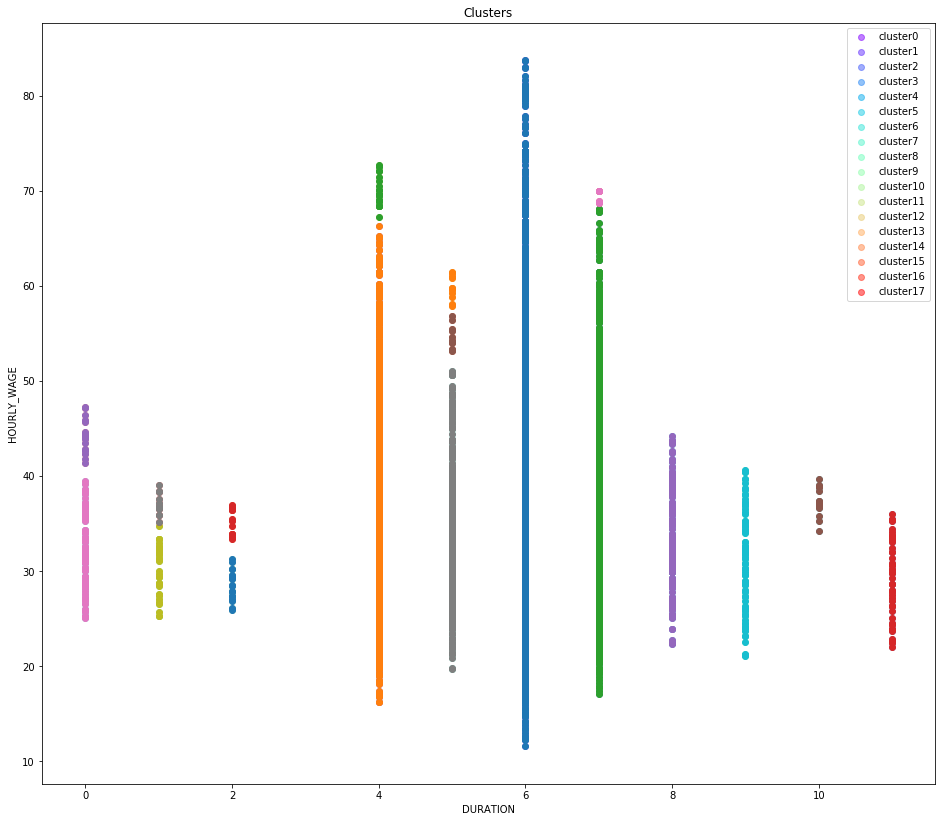

In [109]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, clusterNum))
cluster_labels = list(range(0, clusterNum))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))


#Visualization1
for color, label in zip(colors, cluster_labels):
    subset = cdf[cdf.cluster_ == label]
    #for i in subset.index:
            #plt.text(subset.DURATION[i], subset.HOURLY_WAGE[i],'Case status= '+str(subset['CASE_STATUS'][i]), rotation=25) 
    plt.scatter(subset.DURATION, subset.HOURLY_WAGE, c=color, label='cluster'+str(label),alpha=0.5)
    plt.scatter(subset.DURATION, subset.HOURLY_WAGE)
       

plt.legend()
plt.title('Clusters')
plt.xlabel('DURATION')
plt.ylabel('HOURLY_WAGE')
plt.savefig('DBC', dpi = 300, orientation = 'landscape', transparent=False, bbox_inches='tight')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

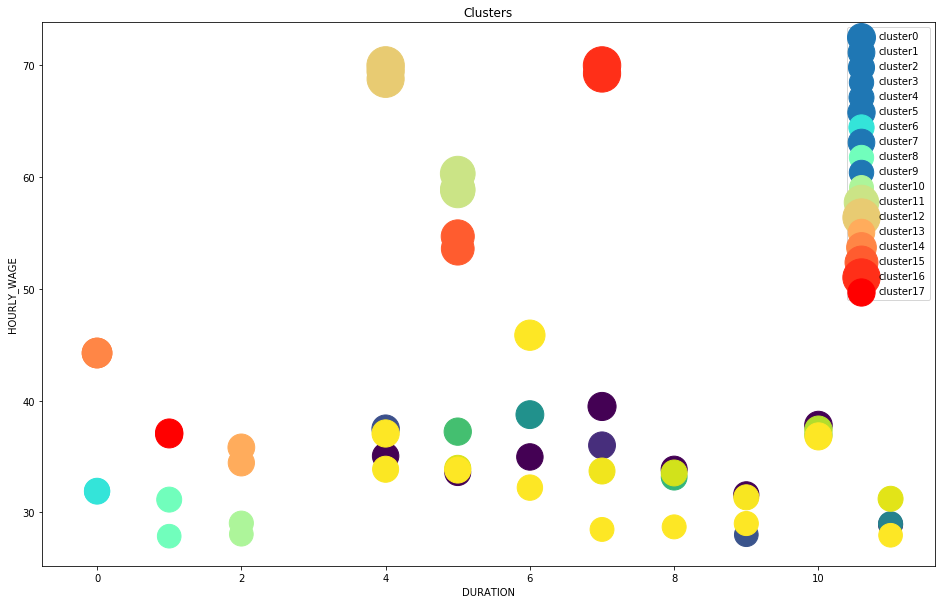

In [110]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg.loc[(label,),]
    #for i in subset.index:
        #plt.text(subset.loc[i][0], subset.loc[i][1], 'CASE_STATUS, AGENT_PRESENT='+str(i))
    plt.scatter(subset.DURATION, subset.HOURLY_WAGE, s=subset.HOURLY_WAGE*20, c=color, label='cluster'+str(label))
    
plt.legend()
plt.title('Clusters')
plt.xlabel('DURATION')
plt.ylabel('HOURLY_WAGE')
plt.savefig('2DBC.png', dpi = 300, orientation = 'landscape', transparent=False, bbox_inches='tight')